In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [ ]:
df = pd.read_csv('data.csv', sep=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5084 entries, 0 to 5083
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Регион              5084 non-null   object 
 1   Учебное учреждение  5084 non-null   object 
 2   Доля несъедаемых    5084 non-null   int64  
 3   Всего меню          5084 non-null   int64  
 4   % по Санпин         5084 non-null   float64
 5   Стоимость завтрак   5084 non-null   float64
 6   Стоимость обед      5084 non-null   float64
 7   Бз                  5084 non-null   float64
 8   Жз                  5084 non-null   float64
 9   Уз                  5084 non-null   float64
 10  Бо                  5084 non-null   float64
 11  Жо                  5084 non-null   float64
 12  Уо                  5084 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 516.5+ KB


In [ ]:
df.head()

,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
0,Московская область,МАОУ «Лицей (ЭБ)»,20,3,66.7,131.87,114.82,31.33,13.8,77.60,26.80,22.60,75.03
1,Московская область,МАОУ «СОШ № 21»,20,4,100.0,127.04,112.03,24.50,19.5,73.75,31.25,20.25,109.25
2,Московская область,МБОУ «СОШ № 20»,20,2,0.0,117.55,100.65,30.50,28.5,87.50,32.40,37.05,75.40
3,Московская область,МКОУ ООШ с.Тахтоямск,-1,2,100.0,114.93,0.00,14.50,15.0,81.90,0.00,0.00,0.00
4,Московская область,МКОУ СОШ п.Ола,20,4,100.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00


In [ ]:
#отсортируем регионы по алфавиту и индексу
df.sort_values(by=['Регион'], inplace=True)
df.index = np.arange(0,5084)
df

,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20,5,100.0,0.00,0.0,15.34,15.84,59.96,22.22,22.62,91.62
1,Алтайский край,"Красноярская СОШ, филиал МКОУ Поспелихинская С...",20,2,100.0,77.00,0.0,16.50,17.00,63.00,0.00,0.00,0.00
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20,5,100.0,75.20,0.0,20.40,21.00,84.20,0.00,0.00,0.00
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30,5,40.0,88.62,0.0,26.00,26.20,103.60,0.00,0.00,0.00
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",-1,5,60.0,0.00,0.0,26.48,25.50,88.70,31.42,32.88,108.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30,4,100.0,79.00,79.0,16.25,19.75,83.50,20.50,23.75,86.00
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20,4,75.0,68.97,79.0,15.75,20.50,95.25,23.25,25.00,101.00
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20,5,80.0,66.09,78.2,21.20,32.60,84.20,29.00,25.40,122.80
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,-1,5,0.0,0.00,0.0,20.20,19.00,76.20,25.80,30.00,100.20


In [ ]:
df.describe()

,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
count,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000
mean,17.489182,4.566090,79.539929,63.683615,50.488175,21.177836,18.168544,70.952884,22.798356,20.487055,68.079072
std,8.536925,0.927087,33.002071,294.921707,155.459625,108.351901,42.357557,77.731703,314.062633,176.052516,123.852978
min,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,5.000000,72.925000,0.000000,0.000000,15.400000,14.830000,64.265000,0.000000,0.000000,0.000000
50%,20.000000,5.000000,100.000000,67.790000,0.000000,19.000000,18.500000,76.500000,23.800000,22.400000,91.010000
75%,20.000000,5.000000,100.000000,86.000000,90.000000,22.440000,21.700000,86.042500,28.740000,27.662500,109.400000
max,50.000000,6.000000,100.000000,17789.140000,9852.360000,6017.180000,2021.820000,2094.700000,22012.860000,12014.560000,6144.240000


In [ ]:
df['Учебное учреждение'].value_counts()

,count
Учебное учреждение,
КГОБУ Уссурийская КШ,2
МБОУ Средняя общеобразовательная школа п. Ребристый,2
"МКОУ ""Троицкая средняя общеобразовательная школ№ 5""",2
"МКОУ ""Талицкая средняя общеобразовательная школ№ 4""",2
"МКОУ ""Талицкая общеобразовательная школа № 8""",2
...,...
Лазазейский филиал муниципального бюджетного общеобразовательного учреждения «Помринская основная школа»,1
МБОУ Хватовская ОШ,1
"МБОУ ""СОШ №20 имени В.Г.Рязанова""",1


In [ ]:
#убираем дуликаты
df.drop_duplicates(subset = ['Учебное учреждение'], inplace=True)
df.drop_duplicates(subset = ['Бз','Жз','Уз','Бо','Жо','Уо'], inplace=True)

In [ ]:
df['Учебное учреждение'].value_counts()

,count
Учебное учреждение,
"МАОУ СОШ № 134, г.Барнаул",1
МБОУ Зайцевская СОШ (Красносулинский район),1
МБОУ СОШ №1 (Константиновский район),1
МБОУ Ведерниковская ООШ (Константиновский район),1
МБОУ Киевская СОШ (Кашарский район),1
...,...
МБОУ школа №10,1
МБОУ школа №8,1
МКОУ Либежевская СШ,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4210 entries, 0 to 5083
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Регион              4210 non-null   object 
 1   Учебное учреждение  4210 non-null   object 
 2   Доля несъедаемых    4210 non-null   int64  
 3   Всего меню          4210 non-null   int64  
 4   % по Санпин         4210 non-null   float64
 5   Стоимость завтрак   4210 non-null   float64
 6   Стоимость обед      4210 non-null   float64
 7   Бз                  4210 non-null   float64
 8   Жз                  4210 non-null   float64
 9   Уз                  4210 non-null   float64
 10  Бо                  4210 non-null   float64
 11  Жо                  4210 non-null   float64
 12  Уо                  4210 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 460.5+ KB


In [ ]:
df['Доля несъедаемых'].value_counts()

,count
Доля несъедаемых,
20,3288
-1,646
30,243
40,22
50,11


In [ ]:
df.loc[df['Доля несъедаемых'] < 1, 'Доля несъедаемых'] = 0

In [ ]:
df['Всего меню'].value_counts()

,count
Всего меню,
5,3097
4,655
3,201
1,129
2,123
6,5


In [ ]:
#в дальнейшем анализе будем использовать данные, где количество меню превышает 50%
df1 = df[df['Всего меню'] >= 3]
df1['Всего меню'].value_counts()

,count
Всего меню,
5,3097
4,655
3,201
6,5


In [ ]:
# проверяем на наличие пропусков в столбцах по бжу и стоимости
filtered_df = df1[(df1['Стоимость завтрак'] < 1 ) & (df1['Стоимость обед'] < 1) & (df1['Бз'] < 1) & (df1['Бо'] < 1)]
filtered_df

,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
121,Алтайский край,"МБОУ Семёно-Красиловская СОШ, Кытмановский район",0,5,100.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0
2770,Республика Дагестан,"МКОУ ""Санчинская СОШ""",20,5,100.0,0.02,0.0,0.64,718.22,79.56,0.0,0.0,0.0


In [ ]:
df1.drop(121, inplace=True)
df1.drop(2770, inplace=True)

<ipython-input-17-2702a9a17397>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(121, inplace=True)
<ipython-input-17-2702a9a17397>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(2770, inplace=True)


In [ ]:
df1['Доля несъедаемых'] = df1['Доля несъедаемых'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3956 entries, 0 to 5083
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Регион              3956 non-null   object 
 1   Учебное учреждение  3956 non-null   object 
 2   Доля несъедаемых    3956 non-null   float64
 3   Всего меню          3956 non-null   int64  
 4   % по Санпин         3956 non-null   float64
 5   Стоимость завтрак   3956 non-null   float64
 6   Стоимость обед      3956 non-null   float64
 7   Бз                  3956 non-null   float64
 8   Жз                  3956 non-null   float64
 9   Уз                  3956 non-null   float64
 10  Бо                  3956 non-null   float64
 11  Жо                  3956 non-null   float64
 12  Уо                  3956 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 432.7+ KB


<ipython-input-18-f3780b483fc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Доля несъедаемых'] = df1['Доля несъедаемых'].astype(float)


In [ ]:
#поиск и обработка отсутствующих значений
df2 = df1[:]
df2.replace(0.0, np.NaN, inplace=True)
df2

,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,NaN,NaN,15.34,15.84,59.96,22.22,22.62,91.62
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.20,NaN,20.40,21.00,84.20,NaN,NaN,NaN
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.62,NaN,26.00,26.20,103.60,NaN,NaN,NaN
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",NaN,5,60.0,NaN,NaN,26.48,25.50,88.70,31.42,32.88,108.62
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,NaN,NaN,26.00,25.00,94.50,29.75,31.50,110.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.00,79.0,16.25,19.75,83.50,20.50,23.75,86.00
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.97,79.0,15.75,20.50,95.25,23.25,25.00,101.00
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.09,78.2,21.20,32.60,84.20,29.00,25.40,122.80
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,NaN,5,NaN,NaN,NaN,20.20,19.00,76.20,25.80,30.00,100.20


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3956 entries, 0 to 5083
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Регион              3956 non-null   object 
 1   Учебное учреждение  3956 non-null   object 
 2   Доля несъедаемых    3352 non-null   float64
 3   Всего меню          3956 non-null   int64  
 4   % по Санпин         3598 non-null   float64
 5   Стоимость завтрак   2705 non-null   float64
 6   Стоимость обед      1874 non-null   float64
 7   Бз                  3336 non-null   float64
 8   Жз                  3336 non-null   float64
 9   Уз                  3336 non-null   float64
 10  Бо                  2362 non-null   float64
 11  Жо                  2362 non-null   float64
 12  Уо                  2362 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 432.7+ KB


In [ ]:
df_num3 = df2.select_dtypes('float64')
imputer = KNNImputer(n_neighbors=5, weights='uniform') #создаем импьютер
imputer.fit(df_num3)
df_num3 = pd.DataFrame(imputer.transform(df_num3), index=df_num3.index, columns=df_num3.columns) #заполняем недостающие значения
df_num3

,Доля несъедаемых,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
0,20.0,100.0,65.032,103.442,15.34,15.84,59.96,22.220,22.620,91.620
2,20.0,100.0,75.200,105.624,20.40,21.00,84.20,32.588,27.754,101.112
3,30.0,40.0,88.620,2054.842,26.00,26.20,103.60,23.666,27.464,106.180
4,20.0,60.0,127.040,99.794,26.48,25.50,88.70,31.420,32.880,108.620
5,20.0,25.0,86.700,78.794,26.00,25.00,94.50,29.750,31.500,110.500
...,...,...,...,...,...,...,...,...,...,...
5079,30.0,100.0,79.000,79.000,16.25,19.75,83.50,20.500,23.750,86.000
5080,20.0,75.0,68.970,79.000,15.75,20.50,95.25,23.250,25.000,101.000
5081,20.0,80.0,66.090,78.200,21.20,32.60,84.20,29.000,25.400,122.800
5082,20.0,100.0,83.718,109.750,20.20,19.00,76.20,25.800,30.000,100.200


In [ ]:
df1['Стоимость обед']=df_num3['Стоимость обед']
df1['Стоимость завтрак']=df_num3['Стоимость завтрак']
df1['Бз']=df_num3['Бз']
df1['Жз']=df_num3['Жз']
df1['Уз']=df_num3['Уз']
df1['Бо']=df_num3['Бо']
df1['Жо']=df_num3['Жо']
df1['Уо']=df_num3['Уо']
df1['Доля несъедаемых']=df_num3['Доля несъедаемых']
df1['% по Санпин']=df_num3['% по Санпин']
df1

<ipython-input-23-af618bc1d8a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Стоимость обед']=df_num3['Стоимость обед']
<ipython-input-23-af618bc1d8a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Стоимость завтрак']=df_num3['Стоимость завтрак']
<ipython-input-23-af618bc1d8a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,65.032,103.442,15.34,15.84,59.96,22.220,22.620,91.620
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.200,105.624,20.40,21.00,84.20,32.588,27.754,101.112
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.620,2054.842,26.00,26.20,103.60,23.666,27.464,106.180
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",20.0,5,60.0,127.040,99.794,26.48,25.50,88.70,31.420,32.880,108.620
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,86.700,78.794,26.00,25.00,94.50,29.750,31.500,110.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.000,79.000,16.25,19.75,83.50,20.500,23.750,86.000
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.970,79.000,15.75,20.50,95.25,23.250,25.000,101.000
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.090,78.200,21.20,32.60,84.20,29.000,25.400,122.800
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,20.0,5,100.0,83.718,109.750,20.20,19.00,76.20,25.800,30.000,100.200


In [ ]:
df1.isnull().sum()

,0
Регион,0
Учебное учреждение,0
Доля несъедаемых,0
Всего меню,0
% по Санпин,0
Стоимость завтрак,0
Стоимость обед,0
Бз,0
Жз,0
Уз,0


In [ ]:
#работа с выбросами
df1_num = df1.select_dtypes('float64')
df1_std = pd.DataFrame()
for col in df1_num.columns:
    n = df1_num[col].mean()
    s = df1_num[col].std()
    df1_std[col + '_n'] = (df1_num[col] - n) / s
df1_std.head(10)

,Доля несъедаемых_n,% по Санпин_n,Стоимость завтрак_n,Стоимость обед_n,Бз_n,Жз_n,Уз_n,Бо_n,Жо_n,Уо_n
0,-0.274303,0.635506,-0.103742,-0.039771,-0.122526,-0.161126,-0.355892,-0.065544,-0.101698,-0.255727
2,-0.274303,0.635506,-0.075789,-0.030075,-0.087311,-0.057994,-0.057385,-0.038155,-0.077875,-0.188761
3,2.943797,-2.011446,-0.038896,8.631824,-0.048338,0.045937,0.181519,-0.061724,-0.079221,-0.153007
4,-0.274303,-1.129128,0.066725,-0.055982,-0.044998,0.031946,-0.001969,-0.041240,-0.054089,-0.135793
5,-0.274303,-2.673184,-0.044174,-0.149301,-0.048338,0.021953,0.069455,-0.045652,-0.060492,-0.122529
6,-0.274303,0.635506,-0.077741,-0.063687,-0.019804,-0.003230,0.043841,-0.004637,-0.029282,0.336127
7,-0.274303,0.635506,-0.079088,-0.213354,-0.105405,-0.117955,-0.195309,-0.058728,-0.068381,-0.344760
8,-0.274303,0.635506,-0.097502,-0.142422,-0.051957,-0.046402,0.067731,-0.053598,-0.059082,-0.037856
9,-0.274303,0.635506,-0.079671,-0.115813,-0.027460,0.105898,0.174130,-0.047453,-0.079462,-0.195788
10,-0.274303,0.635506,-0.077741,-0.270190,-0.101926,-0.133145,-0.062557,-0.051701,-0.081559,-0.291002


<ipython-input-29-4e5eb30a5054>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df1_std.columns)


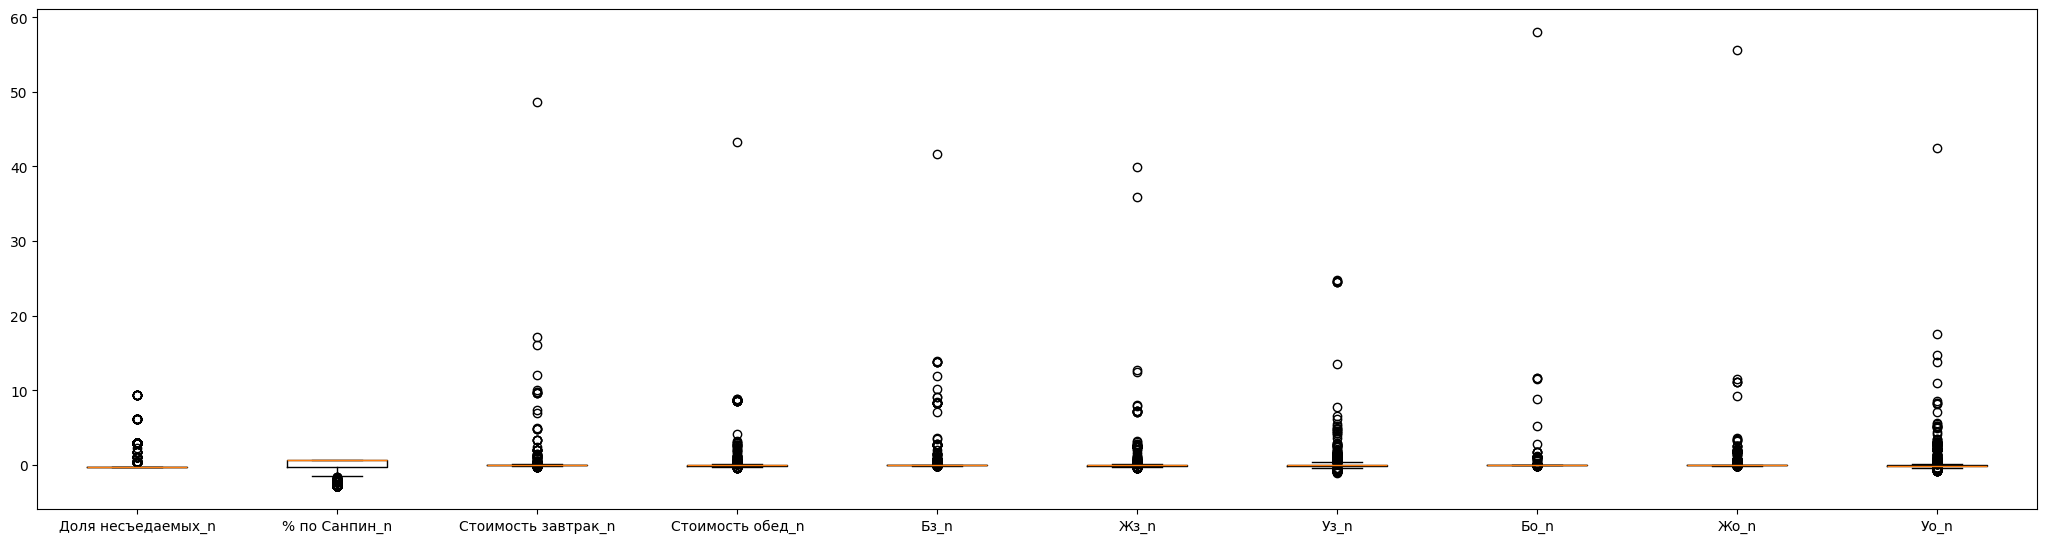

In [ ]:
fig = plt.figure(figsize =(20,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df1_std.columns)

data = []
for col in df1_std.columns:
    data.append(df1_std[col])

bp = ax.boxplot(data, widths=0.5)
plt.show()

In [ ]:
for x in ['Стоимость завтрак']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan


In [ ]:
for x in ['Стоимость обед']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
for x in ['Бз']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
for x in ['Бо']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
for x in ['Жз']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
for x in ['Уз']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
for x in ['Уо']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
for x in ['Жо']:
    q75,q25 = np.percentile(df1.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df1.loc[df1[x] < min,x] = np.nan
    df1.loc[df1[x] > max,x] = np.nan

In [ ]:
df1.describe()

,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
count,3956.000000,3956.000000,3956.000000,3636.000000,3636.000000,3701.000000,3658.000000,3620.000000,3701.000000,3564.000000,3548.000000
mean,20.852376,4.734075,85.594611,79.551866,89.277026,20.819787,20.107449,81.185228,29.944051,28.258529,109.778161
std,3.107423,0.547202,22.667581,16.473344,16.498734,4.110627,3.956267,11.775926,5.143123,4.717847,14.506539
min,20.000000,3.000000,20.000000,34.170000,42.300000,9.380000,9.400000,49.400000,15.330000,14.800000,71.600000
25%,20.000000,5.000000,80.000000,69.570000,77.801500,18.062000,17.600000,73.680000,26.400000,25.156500,101.000000
50%,20.000000,5.000000,100.000000,78.609000,87.507000,20.350000,19.541000,80.239000,29.480000,27.735000,109.131000
75%,20.000000,5.000000,100.000000,90.405000,98.680000,23.390000,22.400000,87.803000,33.100000,30.998500,117.964500
max,50.000000,6.000000,100.000000,128.000000,138.254000,32.800000,31.430000,114.400000,44.860000,42.438000,150.560000


In [ ]:
df1.isnull().sum()

,0
Регион,0
Учебное учреждение,0
Доля несъедаемых,0
Всего меню,0
% по Санпин,0
Стоимость завтрак,320
Стоимость обед,320
Бз,255
Жз,298
Уз,336


In [ ]:
#заполняем образовавшиеся пропуски
df_num3 = df1.select_dtypes('float64')
imputer = KNNImputer(n_neighbors=5, weights='uniform') #создаем импьютер
imputer.fit(df_num3)
df_num3 = pd.DataFrame(imputer.transform(df_num3), index=df_num3.index, columns=df_num3.columns) #заполняем недостающие значения
df_num3


,Доля несъедаемых,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
0,20.0,100.0,65.032,103.4420,15.34,15.8400,59.96,22.220,22.620,91.620
2,20.0,100.0,75.200,105.6240,20.40,21.0000,84.20,32.588,27.754,101.112
3,30.0,40.0,88.620,88.5948,26.00,26.2000,103.60,23.666,27.464,106.180
4,20.0,60.0,127.040,99.7940,26.48,25.5000,88.70,31.420,32.880,108.620
5,20.0,25.0,86.700,78.7940,26.00,25.0000,94.50,29.750,31.500,110.500
...,...,...,...,...,...,...,...,...,...,...
5079,30.0,100.0,79.000,79.0000,16.25,19.7500,83.50,20.500,23.750,86.000
5080,20.0,75.0,68.970,79.0000,15.75,20.5000,95.25,23.250,25.000,101.000
5081,20.0,80.0,66.090,78.2000,21.20,20.2096,84.20,29.000,25.400,122.800
5082,20.0,100.0,83.718,109.7500,20.20,19.0000,76.20,25.800,30.000,100.200


In [ ]:
df1['Стоимость обед']=df_num3['Стоимость обед']
df1['Стоимость завтрак']=df_num3['Стоимость завтрак']
df1['Бз']=df_num3['Бз']
df1['Жз']=df_num3['Жз']
df1['Уз']=df_num3['Уз']
df1['Бо']=df_num3['Бо']
df1['Жо']=df_num3['Жо']
df1['Уо']=df_num3['Уо']

<ipython-input-41-6d60adb9e805>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Стоимость обед']=df_num3['Стоимость обед']
<ipython-input-41-6d60adb9e805>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Стоимость завтрак']=df_num3['Стоимость завтрак']
<ipython-input-41-6d60adb9e805>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
df1.isnull().sum()

,0
Регион,0
Учебное учреждение,0
Доля несъедаемых,0
Всего меню,0
% по Санпин,0
Стоимость завтрак,0
Стоимость обед,0
Бз,0
Жз,0
Уз,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3956 entries, 0 to 5083
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Регион              3956 non-null   object 
 1   Учебное учреждение  3956 non-null   object 
 2   Доля несъедаемых    3956 non-null   float64
 3   Всего меню          3956 non-null   int64  
 4   % по Санпин         3956 non-null   float64
 5   Стоимость завтрак   3956 non-null   float64
 6   Стоимость обед      3956 non-null   float64
 7   Бз                  3956 non-null   float64
 8   Жз                  3956 non-null   float64
 9   Уз                  3956 non-null   float64
 10  Бо                  3956 non-null   float64
 11  Жо                  3956 non-null   float64
 12  Уо                  3956 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 432.7+ KB


In [ ]:
df1.describe()

,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо
count,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000
mean,20.852376,4.734075,85.594611,79.687190,89.063017,20.842372,20.161050,81.235000,29.998023,28.365012,109.897696
std,3.107423,0.547202,22.667581,16.105287,16.036062,4.040649,3.868258,11.466451,5.034830,4.593302,14.080474
min,20.000000,3.000000,20.000000,34.170000,42.300000,9.380000,9.400000,49.400000,15.330000,14.800000,71.600000
25%,20.000000,5.000000,80.000000,69.770000,78.013000,18.200000,17.740000,73.980000,26.529500,25.357000,101.400000
50%,20.000000,5.000000,100.000000,78.873000,87.261000,20.400000,19.680000,80.400000,29.598000,27.879000,109.318000
75%,20.000000,5.000000,100.000000,90.512600,97.909000,23.330000,22.400000,87.699000,33.053000,31.028500,117.991600
max,50.000000,6.000000,100.000000,128.000000,138.254000,32.800000,31.430000,114.400000,44.860000,42.438000,150.560000


In [ ]:
grouped = df1.groupby('Регион')
aggregated = grouped.agg({'Стоимость обед': 'mean'})
print(aggregated)

                                 Стоимость обед
Регион                                         
Алтайский край                        89.169958
Амурская область                      86.839271
Астраханская область                  93.991967
Белгородская область                  83.732829
Брянская область                      85.434321
...                                         ...
Чеченская республика                  81.551884
Чувашская республика                  75.135895
Чукотский автономный округ            81.410000
Ямало-Ненецкий автономный округ       94.692194
Ярославская область                   85.562762

[83 rows x 1 columns]


In [ ]:
grouped = df1.groupby('Регион')
aggregated = grouped.agg({'% по Санпин': 'mean'})
print(aggregated)

                                 % по Санпин
Регион                                      
Алтайский край                     91.171970
Амурская область                   82.496863
Астраханская область               91.750000
Белгородская область               78.291304
Брянская область                   92.339286
...                                      ...
Чеченская республика               74.842105
Чувашская республика               77.378947
Чукотский автономный округ         80.000000
Ямало-Ненецкий автономный округ    89.000000
Ярославская область                83.333333

[83 rows x 1 columns]


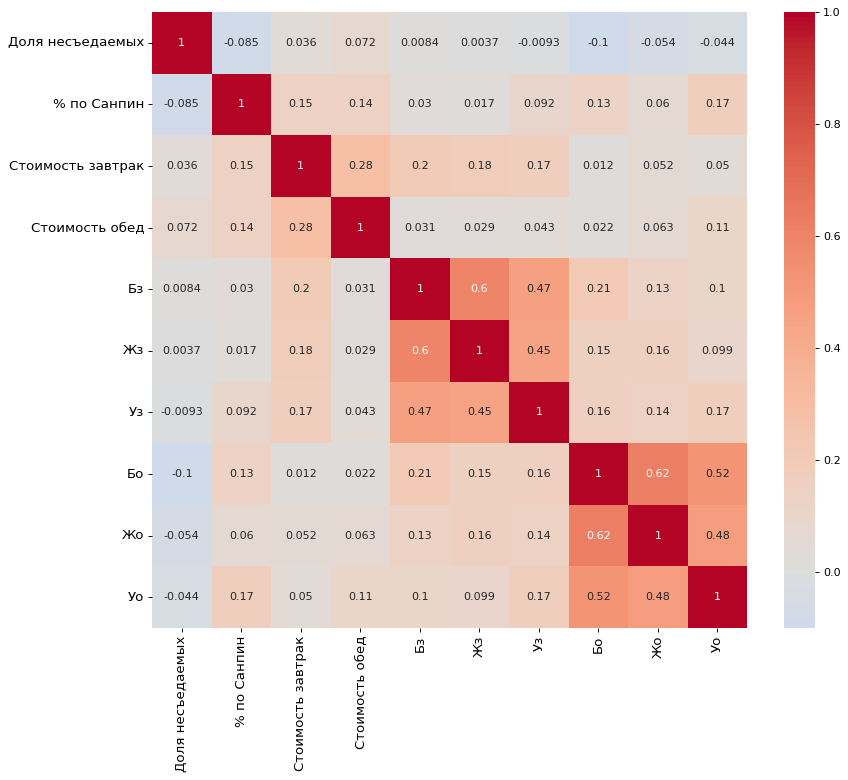

In [ ]:
plt.figure(figsize=(12,10), dpi=80)
sns.heatmap(df1_num.corr(method='spearman'), xticklabels=df1_num.corr(method='spearman').columns, yticklabels=df1_num.corr(method='spearman').columns, cmap='coolwarm', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
df1['proteins_b'] = 0
df1.loc[df1['Бз'] < 14, 'proteins_b'] = 'недостаток'
condition = (df1['Бз'] > 13) & (df1['Бз'] < 28)
df1.loc[condition, 'proteins_b'] = 'норма'
df1.loc[df1['Бз'] >= 28, 'proteins_b'] = 'избыток'
df1

<ipython-input-110-1f3ee98843ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['proteins_b'] = 0
<ipython-input-110-1f3ee98843ac>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'недостаток' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[df1['Бз'] < 14, 'proteins_b'] = 'недостаток'


,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,...,Жо,Уо,proteins_b,fats_b,carb_b,breakf,proteins_d,fats_d,carb_d,dinner
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,65.032,103.4420,15.34,15.8400,59.96,...,22.620,91.620,норма,норма,норма,1,норма,норма,норма,1
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.200,105.6240,20.40,21.0000,84.20,...,27.754,101.112,норма,норма,норма,0,норма,норма,норма,1
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.620,88.5948,26.00,26.2000,103.60,...,27.464,106.180,норма,норма,норма,0,норма,норма,норма,1
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",20.0,5,60.0,127.040,99.7940,26.48,25.5000,88.70,...,32.880,108.620,норма,норма,норма,0,норма,норма,норма,1
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,86.700,78.7940,26.00,25.0000,94.50,...,31.500,110.500,норма,норма,норма,0,норма,норма,норма,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.000,79.0000,16.25,19.7500,83.50,...,23.750,86.000,норма,норма,норма,0,норма,норма,норма,1
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.970,79.0000,15.75,20.5000,95.25,...,25.000,101.000,норма,норма,норма,0,норма,норма,норма,1
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.090,78.2000,21.20,20.2096,84.20,...,25.400,122.800,норма,норма,норма,0,норма,норма,норма,1
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,20.0,5,100.0,83.718,109.7500,20.20,19.0000,76.20,...,30.000,100.200,норма,норма,норма,1,норма,норма,норма,1


In [ ]:
df1['proteins_b'].value_counts()

,count
proteins_b,
норма,3648
избыток,225
недостаток,83


In [ ]:
df1['fats_b'] = 0
df1.loc[df1['Жз'] < 14, 'fats_b'] = 'недостаток'
condition = (df1['Жз'] > 13) & (df1['Жз'] < 28)
df1.loc[condition, 'fats_b'] = 'норма'
df1.loc[df1['Жз'] >= 28, 'fats_b'] = 'избыток'

df1['carb_b'] = 0
df1.loc[df1['Уз'] < 48, 'carb_b'] = 'недостаток'
condition = (df1['Уз'] > 47) & (df1['Уз'] < 90)
df1.loc[condition, 'carb_b'] = 'норма'
df1.loc[df1['Уз'] >= 90, 'carb_b'] = 'избыток'
df1

<ipython-input-118-a85cdd35908a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fats_b'] = 0
<ipython-input-118-a85cdd35908a>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'недостаток' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[df1['Жз'] < 14, 'fats_b'] = 'недостаток'
<ipython-input-118-a85cdd35908a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['carb_b'] =

,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,...,Жо,Уо,proteins_b,fats_b,carb_b,breakf,proteins_d,fats_d,carb_d,dinner
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,65.032,103.4420,15.34,15.8400,59.96,...,22.620,91.620,норма,норма,норма,1,норма,норма,норма,1
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.200,105.6240,20.40,21.0000,84.20,...,27.754,101.112,норма,норма,норма,0,норма,норма,норма,1
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.620,88.5948,26.00,26.2000,103.60,...,27.464,106.180,норма,норма,избыток,0,норма,норма,норма,1
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",20.0,5,60.0,127.040,99.7940,26.48,25.5000,88.70,...,32.880,108.620,норма,норма,норма,0,норма,норма,норма,1
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,86.700,78.7940,26.00,25.0000,94.50,...,31.500,110.500,норма,норма,избыток,0,норма,норма,норма,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.000,79.0000,16.25,19.7500,83.50,...,23.750,86.000,норма,норма,норма,0,норма,норма,норма,1
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.970,79.0000,15.75,20.5000,95.25,...,25.000,101.000,норма,норма,избыток,0,норма,норма,норма,1
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.090,78.2000,21.20,20.2096,84.20,...,25.400,122.800,норма,норма,норма,0,норма,норма,норма,1
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,20.0,5,100.0,83.718,109.7500,20.20,19.0000,76.20,...,30.000,100.200,норма,норма,норма,1,норма,норма,норма,1


In [ ]:
df1['carb_b'].value_counts()

,count
carb_b,
норма,3174
избыток,782


In [ ]:
df1['fats_b'].value_counts()

,count
fats_b,
норма,3683
избыток,163
недостаток,110


In [ ]:
df1['breakf'] = 0
condition = (df1['proteins_b'] == 'норма') & (df1['fats_b'] == 'норма')& (df1['carb_b'] == 'норма')
df1.loc[condition, 'breakf'] = 1
df1

<ipython-input-77-fdfa9683079c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['breakf'] = 0


,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,Бо,Жо,Уо,proteins_b,fats_b,carb_b,breakf
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,65.032,103.4420,15.34,15.8400,59.96,22.220,22.620,91.620,норма,норма,норма,1
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.200,105.6240,20.40,21.0000,84.20,32.588,27.754,101.112,норма,норма,избыток,0
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.620,88.5948,26.00,26.2000,103.60,23.666,27.464,106.180,норма,норма,избыток,0
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",20.0,5,60.0,127.040,99.7940,26.48,25.5000,88.70,31.420,32.880,108.620,норма,норма,избыток,0
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,86.700,78.7940,26.00,25.0000,94.50,29.750,31.500,110.500,норма,норма,избыток,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.000,79.0000,16.25,19.7500,83.50,20.500,23.750,86.000,норма,норма,избыток,0
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.970,79.0000,15.75,20.5000,95.25,23.250,25.000,101.000,норма,норма,избыток,0
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.090,78.2000,21.20,20.2096,84.20,29.000,25.400,122.800,норма,норма,избыток,0
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,20.0,5,100.0,83.718,109.7500,20.20,19.0000,76.20,25.800,30.000,100.200,норма,норма,норма,1


In [ ]:
df1['breakf'].value_counts()

,count
breakf,
0,2129
1,1827


In [ ]:
df1['proteins_d'] = 0
condition1 = (df1['Бо'] < 20) & (df1['Бо'] > 0)
df1.loc[condition1, 'proteins_d'] = 'недостаток'
condition = (df1['Бо'] > 19) & (df1['Бо'] < 40)
df1.loc[condition, 'proteins_d'] = 'норма'
df1.loc[df1['Бо'] >= 40, 'proteins_d'] = 'избыток'

df1['fats_d'] = 0
df1.loc[df1['Жо'] < 20, 'fats_d'] = 'недостаток'
condition = (df1['Жо'] > 19) & (df1['Жо'] < 40)
df1.loc[condition, 'fats_d'] = 'норма'
df1.loc[df1['Жо'] >= 40, 'fats_d'] = 'избыток'

df1['carb_d'] = 0
df1.loc[df1['Уо'] < 80, 'carb_d'] = 'недостаток'
condition = (df1['Уо'] > 79) & (df1['Уо'] < 160)
df1.loc[condition, 'carb_d'] = 'норма'
df1.loc[df1['Уо'] >= 160, 'carb_d'] = 'избыток'
df1

<ipython-input-124-1aa2d12793e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['proteins_d'] = 0
<ipython-input-124-1aa2d12793e9>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'недостаток' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[condition1, 'proteins_d'] = 'недостаток'
<ipython-input-124-1aa2d12793e9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fats_d

,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,...,Жо,Уо,proteins_b,fats_b,carb_b,breakf,proteins_d,fats_d,carb_d,dinner
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,65.032,103.4420,15.34,15.8400,59.96,...,22.620,91.620,норма,норма,норма,1,норма,норма,норма,1
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.200,105.6240,20.40,21.0000,84.20,...,27.754,101.112,норма,норма,норма,0,норма,норма,норма,1
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.620,88.5948,26.00,26.2000,103.60,...,27.464,106.180,норма,норма,избыток,0,норма,норма,норма,1
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",20.0,5,60.0,127.040,99.7940,26.48,25.5000,88.70,...,32.880,108.620,норма,норма,норма,0,норма,норма,норма,1
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,86.700,78.7940,26.00,25.0000,94.50,...,31.500,110.500,норма,норма,избыток,0,норма,норма,норма,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.000,79.0000,16.25,19.7500,83.50,...,23.750,86.000,норма,норма,норма,0,норма,норма,норма,1
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.970,79.0000,15.75,20.5000,95.25,...,25.000,101.000,норма,норма,избыток,0,норма,норма,норма,1
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.090,78.2000,21.20,20.2096,84.20,...,25.400,122.800,норма,норма,норма,0,норма,норма,норма,1
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,20.0,5,100.0,83.718,109.7500,20.20,19.0000,76.20,...,30.000,100.200,норма,норма,норма,1,норма,норма,норма,1


In [ ]:
df1['fats_d'].value_counts()

,count
fats_d,
норма,3833
недостаток,62
избыток,61


In [ ]:
df1['carb_d'].value_counts()

,count
carb_d,
норма,3873
недостаток,75
избыток,8


In [ ]:
df1['proteins_d'].value_counts()

,count
proteins_d,
норма,3748
избыток,161
недостаток,47


In [ ]:
df1['dinner'] = 0
condition = (df1['proteins_d'] == 'норма') & (df1['fats_d'] == 'норма')& (df1['carb_d'] == 'норма')
df1.loc[condition, 'dinner'] = 1
df1

<ipython-input-106-ea636777b35e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dinner'] = 0


,Регион,Учебное учреждение,Доля несъедаемых,Всего меню,% по Санпин,Стоимость завтрак,Стоимость обед,Бз,Жз,Уз,...,Жо,Уо,proteins_b,fats_b,carb_b,breakf,proteins_d,fats_d,carb_d,dinner
0,Алтайский край,"МАОУ СОШ № 134, г.Барнаул",20.0,5,100.0,65.032,103.4420,15.34,15.8400,59.96,...,22.620,91.620,норма,норма,норма,1,норма,норма,норма,1
2,Алтайский край,"Факел Социализма СОШ, филиал МКОУ Поспелихинск...",20.0,5,100.0,75.200,105.6240,20.40,21.0000,84.20,...,27.754,101.112,норма,норма,избыток,0,норма,норма,норма,1
3,Алтайский край,"Бурановская ООШ, Филиал МБОУ Гуселетовской СОШ...",30.0,5,40.0,88.620,88.5948,26.00,26.2000,103.60,...,27.464,106.180,норма,норма,избыток,0,норма,норма,норма,1
4,Алтайский край,"МБОУ Гимназия № 8, г.Рубцовск",20.0,5,60.0,127.040,99.7940,26.48,25.5000,88.70,...,32.880,108.620,норма,норма,избыток,0,норма,норма,норма,1
5,Алтайский край,"МБОУ СОШ № 18, г.Рубцовск",20.0,4,25.0,86.700,78.7940,26.00,25.0000,94.50,...,31.500,110.500,норма,норма,избыток,0,норма,норма,норма,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,Ярославская область,МОУ средняя школа поселка Ярославка ЯМР,30.0,4,100.0,79.000,79.0000,16.25,19.7500,83.50,...,23.750,86.000,норма,норма,избыток,0,норма,норма,норма,1
5080,Ярославская область,МОУ Туношенская средняя школа имени Героя Росс...,20.0,4,75.0,68.970,79.0000,15.75,20.5000,95.25,...,25.000,101.000,норма,норма,избыток,0,норма,норма,норма,1
5081,Ярославская область,МОУ Покрово-Ситская СОШ,20.0,5,80.0,66.090,78.2000,21.20,20.2096,84.20,...,25.400,122.800,норма,норма,избыток,0,норма,норма,норма,1
5082,Ярославская область,МОУ Дивногорская основная общеобразовательная ...,20.0,5,100.0,83.718,109.7500,20.20,19.0000,76.20,...,30.000,100.200,норма,норма,норма,1,норма,норма,норма,1


In [ ]:
df1['dinner'].value_counts()

,count
dinner,
1,3608
0,348


<Axes: ylabel='Frequency'>

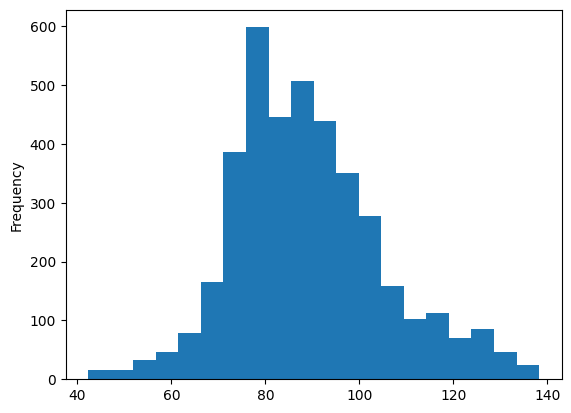

In [ ]:
df1['Стоимость обед'].plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

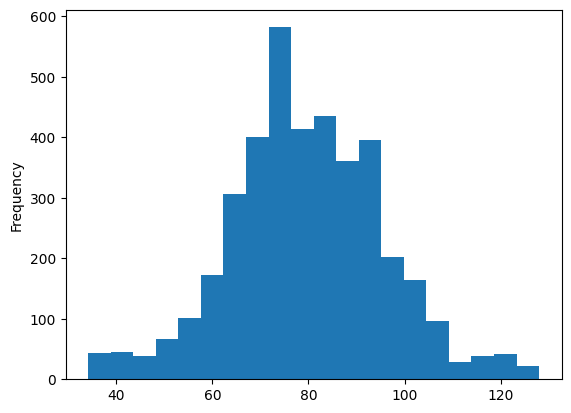

In [ ]:
df1['Стоимость завтрак'].plot(kind='hist', bins=20)

In [ ]:
df1.to_csv('clean_data.csv', sep=';')